# Example: Gene scoring

In case you have not downloaded and imported a reference panel yet, open a terminal and execute in the PascalX/misc folder:

```bash get1KGGRCh38.sh /yourfolder/ EUR```

This command will download and plink convert 1KG project data for the european subpolulation. The data will be stored in ```/yourfolder/```. 

NOTE: The refpanel in the ```demo/``` folder is for chr 1 only and simulated !

#### Load the gene scorer:

In [1]:
from PascalX import genescorer

Gscorer = genescorer.chi2sum(window=50000,varcutoff=0.99)

#### Load the reference panel into the genescorer:


In [2]:
Gscorer.load_refpanel('../demo/EUR.simulated',parallel=1)


Reference panel data not imported. Trying to import...
ERROR:  ../demo/EUR.simulated.chr2.(tped|vcf).gz not found


The first time this command is executed for a reference panel, an internal SNP database will be generated on disk. This process may take several hours. You can use the ```parallel=``` option to speed up via parallelization. Subsequent calls of this method will be very fast.

#### Load a gene annotation:

If you do not have a gene annotation yet, you can download automatically from BioMart via

In [3]:
from PascalX.genome import genome

G = genome()
G.get_ensembl_annotation('biomart_GRCh38.tsv')

done


The annotation will be saved in the file ```biomart_GRCh38.tsv```. 

You still need to load the annotation into the genescorer as follows:

In [4]:
Gscorer.load_genome('biomart_GRCh38.tsv')

18498 active genes


#### Load a GWAS:

In [5]:
Gscorer.load_GWAS("../demo/gwasA.tsv.gz",rscol=0,pcol=4,header=False)


331769 SNPs loaded


You can either load a raw text file or gzip compressed with file ending .gz

#### Start the scoring:

To score all genes in the loaded annotation, execute

In [6]:
R = Gscorer.score_all(parallel=1,nobar=False)

  0%|           [ estimated time left: ? ]

2010 genes scored
16488 genes can not be scored (check annotation)


The raw results will be stored in ```R```. Use the ```parallel=``` option to increase the number of cpu cores to use (make sure that you have sufficient memory). Note that you can switch off the progress bar via setting ```nobar=True```

The top scored genes can be listed via

In [7]:
Gscorer.get_topscores(N=10);

FCRL6   6.3337897451270215e-115
DUSP23   1.2006073400577263e-114
SLAMF8   1.4984862990845065e-91
VSIG8   1.9663781727901362e-68
CFAP45   1.3720600180859263e-45
CELA2B   8.278838936435888e-42
CASP9   4.019089775441723e-41
AGMAT   1.4638516549176884e-16
DNAJC16   2.5862784460748097e-16
BSDC1   0.0023677826637704125


#### Visualisation:

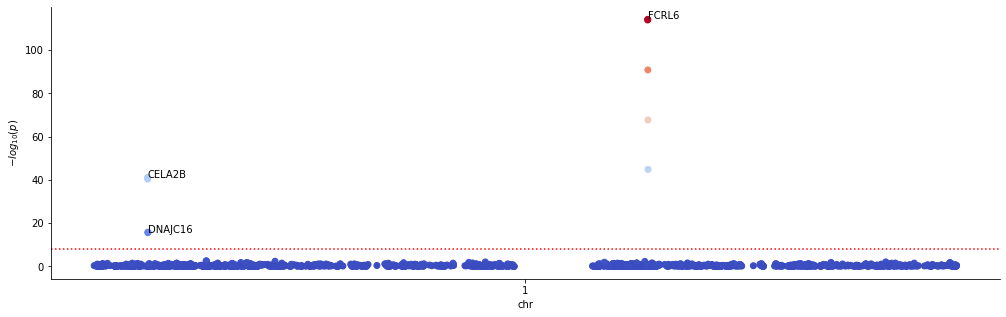

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,5))

Gscorer.plot_Manhattan(R[0],sigLine=1e-8,labelList=['DNAJC16','CELA2B','FCRL6'])

Window size: 50000
Chr: 1
# SNP: 477


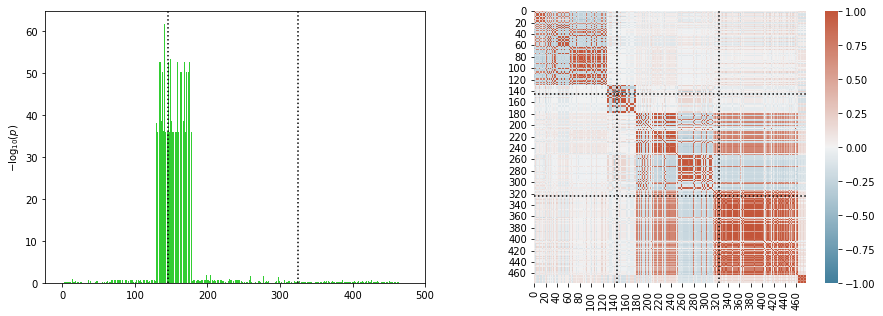

In [24]:
plt.figure(figsize=(15,5))
Gscorer.plot_genesnps('DNAJC16',show_correlation=True,mark_window=True,tickspacing=20);